<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Couette" data-toc-modified-id="Couette-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Couette</a></span></li></ul></div>

# Flow

In [1]:
import numpy as np
import os
import xlrd
import openpyxl as xl
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot, plot, init_notebook_mode
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
import plotly
plotly.tools.set_credentials_file(username='garyhan', api_key='jb6utiwqOF7F3bAuf1Td')
init_notebook_mode(connected=True)

import math
from math import factorial
#import Image
import numpy as np

In [2]:
os.chdir('/Users/gary/OneDrive/Research/Platelets/results/')  # mac
# os.chdir('C:/Users/garyh/OneDrive/Research/Platelets/results/')  # home
# os.chdir('D:/OneDrive/Research/Platelets/results/')  # phy-134
# os.listdir('.')

In [3]:
wb = xl.load_workbook("flow.xlsx", data_only=True)
print(wb.sheetnames)

['10Couette', '20Couette', '30Couette']


## Couette

In [6]:
sheet = [wb['10Couette'], wb['20Couette'], wb['30Couette']]

In [35]:
mydata = []
for sh in sheet:
    vx5 = [x.value for x in sh['f'] if x.value is not None]
    y5 = [x.value for x in sh['d'] if x.value is not None]
    vx1 = [x.value for x in sh['o'] if x.value is not None]
    y1 = [x.value for x in sh['m'] if x.value is not None]
    vx1, vx5, y1, y5 = vx1[1:], vx5[1:], y1[1:], y5[1:]
    reg5 = LinearRegression().fit(np.reshape(vx5, (-1,1)), np.reshape(y5, (-1,1)))
    reg1 = LinearRegression().fit(np.reshape(vx1, (-1,1)), np.reshape(y1, (-1,1)))
    print(sh.title)
    print('5 => intercept: ', reg5.intercept_, 'slope: ', 1/reg5.coef_[0])
    print('1 => intercept: ', reg1.intercept_, 'slope: ', 1/reg1.coef_[0])
    y_fit1 = reg1.predict(np.linspace(-0.5, 0.5, 2).reshape(-1,1))
    y_fit5 = reg5.predict(np.linspace(-0.5, 0.5, 2).reshape(-1,1))
    t1 = go.Scatter(
        y = y1,
        x = vx1,
        mode = 'lines',
        line = dict(color = 'green'),
        name = '1'
    )
    t11 = go.Scatter(
        y = y_fit1.reshape(1,-1)[0],
        x = np.linspace(-0.5, 0.5, 2),
        mode = 'lines',
        line = dict(color = 'light green', dash = 'dot'),
        name = 'fitted1'
    )
    t5 = go.Scatter(
        y = y5,
        x = vx5,
        mode = 'lines',
        line = dict(color = 'blue'),
        name = '5'
    )
    t55 = go.Scatter(
        y = y_fit5.reshape(1,-1)[0],
        x = np.linspace(-0.5, 0.5, 2),
        mode = 'lines',
        line = dict(color = 'light blue', dash = 'dot'),
        name = 'fitted5'
    )
    mydata.append([t1,t5,t11,t55])

10Couette
5 => intercept:  [-1.19038192] slope:  [0.00198058]
1 => intercept:  [0.20116101] slope:  [0.002024]
20Couette
5 => intercept:  [-1.19038192] slope:  [0.00198058]
1 => intercept:  [-0.56433936] slope:  [0.00385007]
30Couette
5 => intercept:  [-0.17404753] slope:  [0.00573833]
1 => intercept:  [-0.18947754] slope:  [0.00574298]


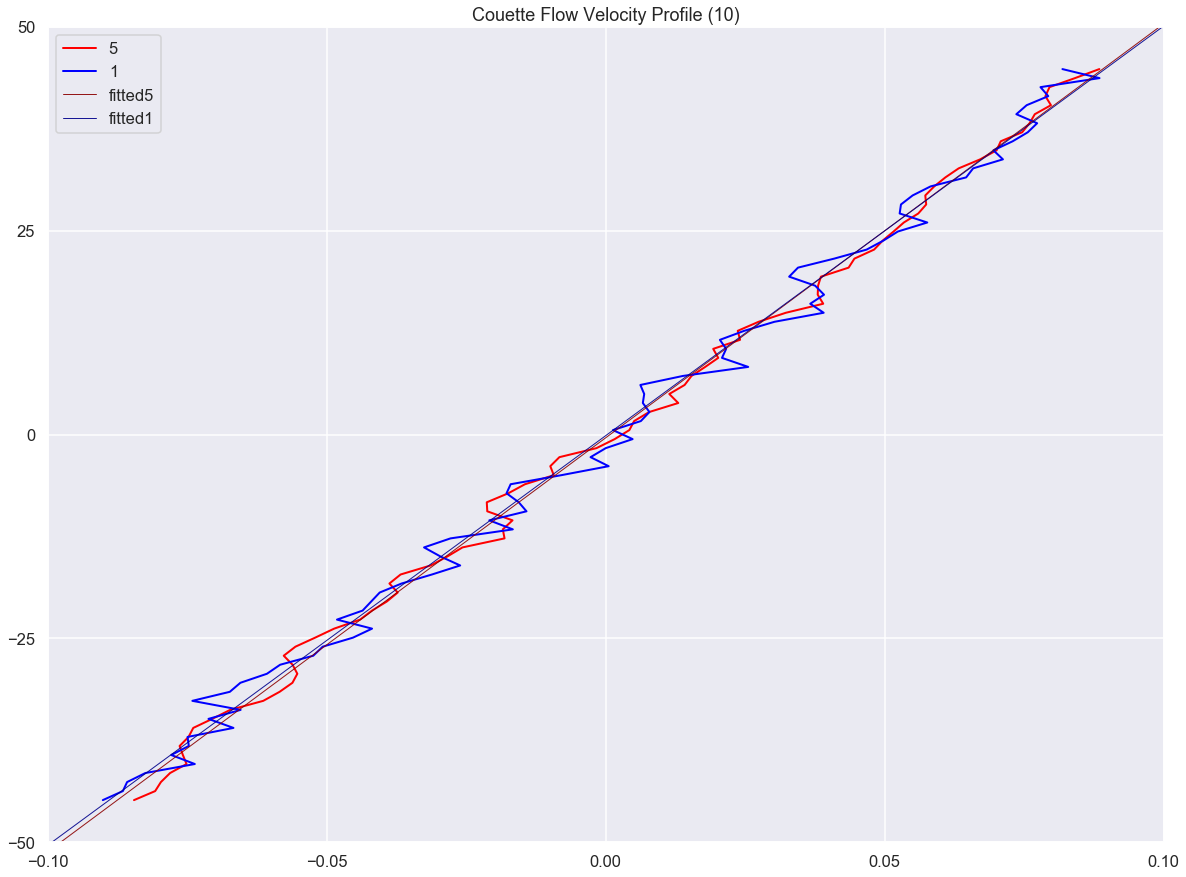

In [25]:
# print(sns.axes_style)
sns.set_style("dark") #, {"xtick.major.size": 20, "ytick.major.size": 20})
sns.set_context("talk") 
df = pd.DataFrame({'vx1':vx1, 'y1':y1, 'vx5':vx5, 'y5':y5})
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(vx5, y5, marker='', color='red', linewidth=2, alpha=1, label='5')
ax.plot(vx1, y1, marker='', color='blue', linewidth=2, alpha=1, label='1')
ax.plot(np.linspace(-0.1, 0.1, 2), y_fit5, marker='', color='darkred', linewidth=1, alpha=0.9, label='fitted5')
ax.plot(np.linspace(-0.1, 0.1, 2), y_fit1, marker='', color='darkblue', linewidth=1, alpha=0.9, label='fitted1')
# sns.lmplot(x='vx1', y='y1', data=df, fit_reg=False)
ax.legend(loc=2, ncol=1)
# ax.legend(frameon=False)
ax.grid(True)
plt.title("Couette Flow Velocity Profile (10)") #, loc='center', fontsize=10, fontweight=0, color='black')
# plt.xlabel("$V_x$")
# plt.ylabel("$y$")
plt.xlim(-0.1, 0.1)
plt.ylim(-50, 50)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))

In [11]:
t10_1 = go.Scatter(
    y = y1,
    x = vx1,
    mode = 'lines+markers',
    line = dict(color = 'green'),
    name = '1'
)
t10_5 = go.Scatter(
    y = y5,
    x = vx5,
    mode = 'lines+markers',
    line = dict(
        color = 'red',
#         width = 4,
#         dash = 'dot'
    ),
    name = '5'
)

In [31]:
layout = go.Layout(
    xaxis=dict(
#         range=[-0.1, 0.1],
        ticks = 'inside',
#         dtick = 6,
        mirror = 'ticks',
        title='$v_x$',
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True,
    ),
    yaxis=dict(
        range=[-50,50],
        title='$y$',
        ticks = 'inside',
        mirror = 'ticks',
#         dtick = 0.01,
        showline=True,
        zeroline=False,
        showticklabels=True,
        showgrid=True
    ),
    legend=dict(
        x=0.03,
        y=0.97,
        traceorder='normal',
        font=dict(color='black'),
#         bgcolor='#E2E2E2',
#         bordercolor='black',
        borderwidth=1
    ),
    showlegend=True,
    autosize=False,
    width=1000,
    height=500,
    margin=go.layout.Margin(
        l=50,
        r=20,
        b=40,
        t=20,
        pad=0
    )
)

In [32]:
fig = go.Figure(data=mydata[0], layout=layout)
# py.iplot(fig, filename='RMSDX')
iplot(fig)
# pio.write_image(fig, 'rmsdx1.png', format='png', scale=5)
# print("Done saving image!")

In [33]:
fig = go.Figure(data=mydata[1], layout=layout)
# py.iplot(fig, filename='RMSDX')
iplot(fig)
# pio.write_image(fig, 'rmsdx1.png', format='png', scale=5)
# print("Done saving image!")

In [34]:
fig = go.Figure(data=mydata[2], layout=layout)
# py.iplot(fig, filename='RMSDX')
iplot(fig)
# pio.write_image(fig, 'rmsdx1.png', format='png', scale=5)
# print("Done saving image!")